# 第三次个人作业（机器学习 + 社会网络分析，满分15分；但最后会在总成绩中折合为10分）

### 第一部分：机器学习（本部分满分10分）

1.1（共6分）请针对Cylinder Bands数据集（bands.data文件）以最后一个字段（band type）为标签，利用第5个至第39个字段为特征建立分类模型。  
数据集介绍请参考[链接](https://archive.ics.uci.edu/ml/datasets/Cylinder+Bands)。注意，模型准确率不影响本作业的得分。

作业具体要求如下：

1.1.1 数据预处理（2分）  
(1) 选择合适的预处理处理方式对标称变量编码（1分）；   
(2) 找到缺失值，并选择合适方式对缺失值填充（1分）。  


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sklearn 
import networkx as nx
cylinder=pd.read_csv(r"D:\数据分析练习用\第三次作业\bands.data" ,header=None,
                    names=['timestamp','cylinder_number','customer','job_number','grain_screened',
'ink_color','proof_on_ctd_ink','blade_mfg','cylinder_division','paper_type','ink_type','direct_steam',
'solvent_type','type_on_cylinder','press_type','press','unit_number','cylinder_size','paper_mill_location',
'plating_tank','proof_cut','viscosity','caliper','ink_temperature','humifity','roughness','blade_pressure',
'varnish_pct','press_speed','ink_pct','solvent_pct','ESA_Voltage','ESA_Amperage','wax','hardener',
'roller_durometer','current_density','anode_space_ratio','chrome_content','band_type'])
print(cylinder.head(5))

  timestamp cylinder_number customer job_number grain_screened ink_color  \
0  19910108            X126  TVGUIDE      25503            YES       KEY   
1  19910109            X266  TVGUIDE      25503            YES       KEY   
2  19910104              B7   MODMAT      47201            YES       KEY   
3  19910104            T133   MASSEY      39039            YES       KEY   
4  19910111             J34    KMART      37351             NO       KEY   

  proof_on_ctd_ink blade_mfg cylinder_division paper_type  ... solvent_pct  \
0              YES    BENTON          GALLATIN   UNCOATED  ...        36.4   
1              YES    BENTON          GALLATIN   UNCOATED  ...        38.5   
2              YES    BENTON          GALLATIN   UNCOATED  ...        39.8   
3              YES    BENTON          GALLATIN   UNCOATED  ...        38.8   
4              YES    BENTON          GALLATIN   UNCOATED  ...        42.5   

  ESA_Voltage ESA_Amperage  wax hardener roller_durometer  current_density

In [2]:
names=cylinder.columns
print(cylinder.isnull().sum())

timestamp              0
cylinder_number        0
customer               0
job_number             0
grain_screened         0
ink_color              0
proof_on_ctd_ink       0
blade_mfg              0
cylinder_division      0
paper_type             0
ink_type               0
direct_steam           0
solvent_type           0
type_on_cylinder       0
press_type             0
press                  0
unit_number            0
cylinder_size          1
paper_mill_location    1
plating_tank           1
proof_cut              1
viscosity              1
caliper                1
ink_temperature        2
humifity               2
roughness              2
blade_pressure         2
varnish_pct            2
press_speed            2
ink_pct                2
solvent_pct            2
ESA_Voltage            2
ESA_Amperage           2
wax                    2
hardener               2
roller_durometer       2
current_density        2
anode_space_ratio      2
chrome_content         2
band_type              2


In [3]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in names:
    enc.fit(cylinder[i].values.reshape(-1,1))
    print(i,enc.categories_)#便于检验异常值缺失值

timestamp [array(['19900330', '19900409', '19900414', '19900417', '19900418',
       '19900425', '19900426', '19900505', '19900507', '19900509',
       '19900510', '19900511', '19900514', '19900517', '19900518',
       '19900524', '19900602', '19900603', '19900606', '19900608',
       '19900611', '19900612', '19900614', '19900615', '19900617',
       '19900620', '19900621', '19900622', '19900625', '19900626',
       '19900702', '19900705', '19900706', '19900707', '19900708',
       '19900710', '19900718', '19900719', '19900723', '19900726',
       '19900727', '19900730', '19900801', '19900804', '19900805',
       '19900806', '19900807', '19900809', '19900810', '19900811',
       '19900812', '19900813', '19900814', '19900818', '19900819',
       '19900820', '19900821', '19900824', '19900825', '19900830',
       '19900831', '19900909', '19900910', '19900913', '19900915',
       '19900920', '19900921', '19900924', '19900926', '19901001',
       '19901002', '19901003', '19901004', '1990100

In [4]:
cylinder['timestamp'].replace({'tabloid':np.nan},inplace=True)
cylinder['timestamp']=cylinder['timestamp'].map(float)
print(cylinder[(cylinder['timestamp']<19500101) | (cylinder['timestamp']>21001231)].shape[0])

0


In [5]:
cylinder.replace({'?':np.nan},inplace=True)
cylinder['grain_screened'].replace({'45':np.nan},inplace=True)
cylinder['ink_color'].replace({'0.200':np.nan,'KeY':'KEY','key':'KEY'},inplace=True)
cylinder['proof_on_ctd_ink'].replace({'17':np.nan},inplace=True)
cylinder['blade_mfg'].replace({'84':np.nan},inplace=True)#benton, daetwyler, uddeholm
cylinder['cylinder_division'].replace({'0.8125':np.nan,'gallatin':'GALLATIN'},inplace=True)#gallatin, warsaw, mattoon
cylinder['paper_type'].replace({'27':np.nan,'coated':'COATED','super':'SUPER','uncoated':'UNCOATED'},inplace=True)# uncoated,coated,super
cylinder['ink_type'].replace({'coated':'COATED','uncoated':'UNCOATED','cover':'COVER'},inplace=True)
cylinder['direct_steam'].replace({'1865':np.nan,'no':'NO'},inplace=True)

cylinder['type_on_cylinder'].replace({'no':'NO','yes':'YES'},inplace=True)


cylinder['unit_number'].replace({'1.5':np.nan},inplace=True)#1, 2, 3, 4, 5, 6, 7, 8, 9, 10
cylinder['cylinder_size'].replace({'0.7':np.nan,'catalog':'CATALOG','spiegel':'SPIEGEL','tabloid':'TABLOID'},inplace=True)
cylinder['paper_mill_location'].replace({'CANAdiAN':'CANADIAN','mideuropean':'MidEuropean'},inplace=True)
#north us, south us, canadian, scandanavian, mid european
cylinder['plating_tank'].replace({'40':'other'},inplace=True)#1910, 1911, other
cylinder['proof_cut']=cylinder['proof_cut'].map(float)
cylinder.loc[((cylinder.loc[:,'proof_cut']<0) | (cylinder.loc[:,'proof_cut']>100)),'proof_cut']=np.nan
cylinder['viscosity']=cylinder['viscosity'].map(float)
cylinder['caliper'].replace({'band':np.nan},inplace=True)
cylinder['caliper']=cylinder['caliper'].map(float)
cylinder['ink_temperature']=cylinder['ink_temperature'].map(float)
cylinder['humifity']=cylinder['humifity'].map(float)
cylinder['roughness']=cylinder['roughness'].map(float)
cylinder['blade_pressure']=cylinder['blade_pressure'].map(float)
cylinder['varnish_pct']=cylinder['varnish_pct'].map(float)
cylinder['press_speed']=cylinder['press_speed'].map(float)
cylinder['ink_pct']=cylinder['ink_pct'].map(float)
cylinder['solvent_pct']=cylinder['solvent_pct'].map(float)#numeric; 0-100
cylinder['ESA_Voltage']=cylinder['ESA_Voltage'].map(float)#numeric; 0-16
cylinder['ESA_Amperage']=cylinder['ESA_Amperage'].map(float)#numeric; 0-10
cylinder['wax']=cylinder['wax'].map(float)#numeric ; 0-4.0
cylinder['hardener']=cylinder['hardener'].map(float)#numeric; 0-3.0
cylinder['roller_durometer']=cylinder['roller_durometer'].map(float)#numeric; 15-120
cylinder['current_density']=cylinder['current_density'].map(float)#numeric; 20-50
cylinder['anode_space_ratio']=cylinder['anode_space_ratio'].map(float)#numeric; 70-130
cylinder['chrome_content']=cylinder['chrome_content'].map(float)#numeric; 80-120
for i in names:
    enc.fit(cylinder[i].values.reshape(-1,1))
    print(i,enc.categories_)

timestamp [array([19900330., 19900409., 19900414., 19900417., 19900418., 19900425.,
       19900426., 19900505., 19900507., 19900509., 19900510., 19900511.,
       19900514., 19900517., 19900518., 19900524., 19900602., 19900603.,
       19900606., 19900608., 19900611., 19900612., 19900614., 19900615.,
       19900617., 19900620., 19900621., 19900622., 19900625., 19900626.,
       19900702., 19900705., 19900706., 19900707., 19900708., 19900710.,
       19900718., 19900719., 19900723., 19900726., 19900727., 19900730.,
       19900801., 19900804., 19900805., 19900806., 19900807., 19900809.,
       19900810., 19900811., 19900812., 19900813., 19900814., 19900818.,
       19900819., 19900820., 19900821., 19900824., 19900825., 19900830.,
       19900831., 19900909., 19900910., 19900913., 19900915., 19900920.,
       19900921., 19900924., 19900926., 19901001., 19901002., 19901003.,
       19901004., 19901005., 19901006., 19901007., 19901008., 19901010.,
       19901014., 19901017., 19901023., 

In [6]:
nominal_names=list(names[1:20])+list(names[-1:])
for i in nominal_names:
    cylinder[i]=enc.fit_transform(cylinder[i].values.reshape(-1,1))
cylinder[nominal_names]

,cylinder_number,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cylinder_division,paper_type,ink_type,direct_steam,solvent_type,type_on_cylinder,press_type,press,unit_number,cylinder_size,paper_mill_location,plating_tank,band_type
0,265.0,61.0,24.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,2.0,4.0,2.0,2.0,2.0,1.0,0.0
1,305.0,61.0,24.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,2.0,4.0,2.0,2.0,2.0,NaN,1.0
2,10.0,49.0,245.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,3.0,2.0,6.0,0.0,2.0,NaN,1.0
3,221.0,47.0,238.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,3.0,3.0,6.0,0.0,2.0,0.0,1.0
4,153.0,44.0,194.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,2.0,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,408.0,78.0,259.0,NaN,0.0,NaN,NaN,0.0,1.0,2.0,NaN,NaN,NaN,2.0,6.0,6.0,2.0,NaN,0.0,0.0
537,423.0,68.0,232.0,NaN,0.0,NaN,NaN,0.0,1.0,0.0,NaN,NaN,1.0,0.0,2.0,0.0,2.0,NaN,0.0,0.0
538,407.0,78.0,260.0,NaN,0.0,NaN,NaN,0.0,1.0,0.0,NaN,NaN,NaN,2.0,6.0,2.0,2.0,NaN,0.0,0.0
539,410.0,78.0,260.0,NaN,0.0,NaN,NaN,0.0,1.0,2.0,NaN,NaN,NaN,2.0,7.0,2.0,2.0,NaN,0.0,0.0


In [7]:
cylinder.dropna(subset='band_type',inplace=True)
#因为band_type会影响机器学习效果，所以对该字段空缺值不予填充，直接扔去
print(cylinder.isnull().sum())
from fancyimpute import IterativeImputer
MICE_Imputer=IterativeImputer()
cylinder.loc[:,:]=MICE_Imputer.fit_transform(cylinder)
print(cylinder.isnull().sum())

timestamp                0
cylinder_number          0
customer                 0
job_number               0
grain_screened          48
ink_color                0
proof_on_ctd_ink        56
blade_mfg               59
cylinder_division        0
paper_type               0
ink_type                 0
direct_steam            24
solvent_type            54
type_on_cylinder        18
press_type               0
press                    0
unit_number              0
cylinder_size            3
paper_mill_location    155
plating_tank            18
proof_cut               54
viscosity                5
caliper                 27
ink_temperature          2
humifity                 1
roughness               30
blade_pressure          63
varnish_pct             55
press_speed             10
ink_pct                 55
solvent_pct             55
ESA_Voltage             56
ESA_Amperage            54
wax                      6
hardener                 7
roller_durometer        54
current_density          7
a

1.0    312
0.0    227
Name: band_type, dtype: int64


<AxesSubplot:xlabel='band_type', ylabel='Count'>

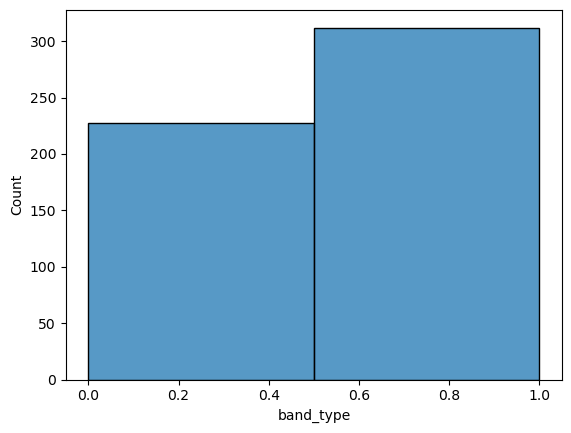

In [8]:
print(cylinder['band_type'].value_counts())
import seaborn as sns
sns.histplot(cylinder,x='band_type',bins=2)
#数据基本平衡

1.1.2 建立模型（2分）：选择2个不同的模型进行建模，并统计训练准确率。

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(cylinder.iloc[:,5:39],cylinder['band_type'],random_state=0)

from sklearn.ensemble import RandomForestClassifier
model_one=RandomForestClassifier()
model_one.fit(X_train,y_train)
y_predict_rfc=model_one.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_predict_rfc,y_test))

0.8296296296296296


In [25]:
from sklearn.neighbors import KNeighborsClassifier
model_two=KNeighborsClassifier()
model_two.fit(X_train,y_train)
y_predict_knn=model_two.predict(X_test)

print(accuracy_score(y_predict_knn,y_test))

0.6444444444444445


D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.1.3 模型比较（2分）  
(1) 比较不同模型的混淆矩阵（1分）；  
(2) 比较不同模型的ROC曲线（0.5分） ；   
(3) 比较不同模型的AUC值（0.5分） 。

rfc混淆矩阵: [[42 22]
 [ 1 70]]
rfc auc value: 0.8210827464788732


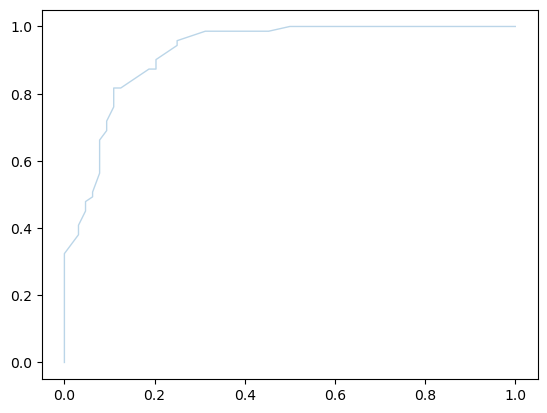

In [26]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_predict_rfc)
print('rfc混淆矩阵:',cnf_matrix)
# ROC曲线 sklearn.metrics.roc_curve()
from sklearn.metrics import roc_curve, auc
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

probas_ = model_one.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
tprs.append(np.interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
plt.plot(fpr, tpr, lw=1, alpha=0.3,
         label='ROC Curve (AUC = %0.2f)' % roc_auc)
print('rfc auc value:',metrics.roc_auc_score(y_test,y_predict_rfc))

knn混淆矩阵: [[37 27]
 [21 50]]
knn auc value: 0.641175176056338


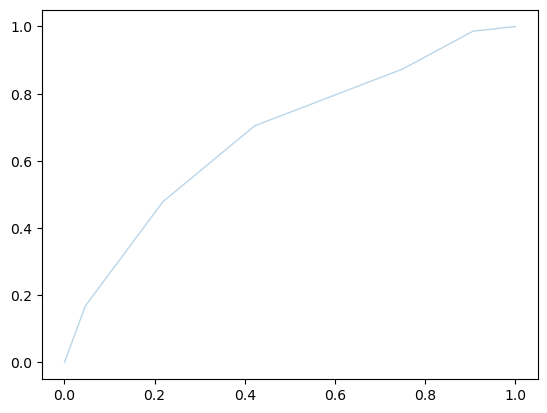

In [27]:
cnf_matrix = metrics.confusion_matrix(y_test, y_predict_knn)
print('knn混淆矩阵:',cnf_matrix)
# ROC曲线 sklearn.metrics.roc_curve()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

probas_ = model_two.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
tprs.append(np.interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
plt.plot(fpr, tpr, lw=1, alpha=0.3,
         label='ROC Curve (AUC = %0.2f)' % roc_auc)
print('knn auc value:',metrics.roc_auc_score(y_test,y_predict_knn))

1.2.（共4分）请利用"BASKET.txt"数据集进行分析。  
作业具体要求如下：

1.2.1 探索性数据分析（2分）  
(1) 分析数据集中除cardid以外各个字段分布情况，并绘图展示（1分）；  
(2) 分析支付方式（pmethod）与金额（value）、性别（sex）、是否有房屋（homeown），收入（income）、年龄（age）之间的关系；请大家分别分析支付方式与题目中所列其他各变量之间的关系（1分）。

In [57]:
basket=pd.read_csv(r"D:\数据分析练习用\第三次作业\BASKETS.txt")
basketnames=basket.columns
for i in basketnames:
    print(i,basket[i].unique())#无异常值
print(basket.isnull().sum())#无缺失值

cardid [ 39808  67362  10872  26748  91609  26630  62995  38765  28935  41792
  59480  60755  70998  80617  61144  36405  76567  85699  11357  97761
  20362  33173  69934  14743  83071  17571  37917  11236  47914  58154
  35197  64892 102467  56677  94105  63817  44887  69720  97267  53750
 109530  65493  96694  46730  60499  73004  21787  28314  24651  29367
  15072  33622  42167  43550  18724  91019  68193  35262  93401  15177
  96173  50180  31828  62022 105225  64668  53320  15068  99849  63694
  24874 104988  84902  96512  99575  33413  57678  89425  60571  76095
  48247  88019  30850  66117  97377 101722  43498  44562  74710  85585
  97287  19268  50150  67455  16350  42778  98181 106522  36278  26130
  57851  81971  57068  69122  68489  46471  88359  44294  95604 103596
 103473  94467  38097  49632  82558  50324  38468  38055  74876  18079
  16316  37166  18334 102645 101100  64861  19041  85771  79303  92675
  71690  86350  88260  86759  49861  21543  70481  29944  46054  61329

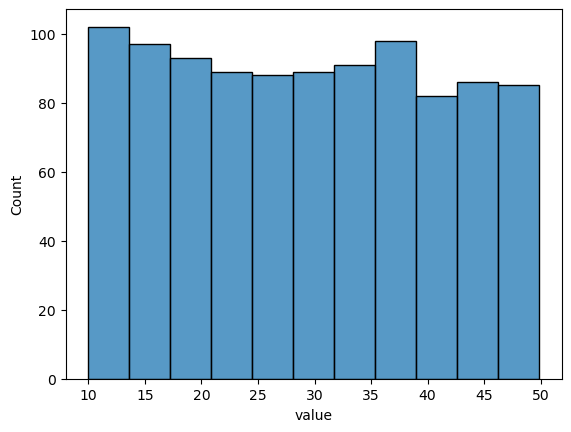

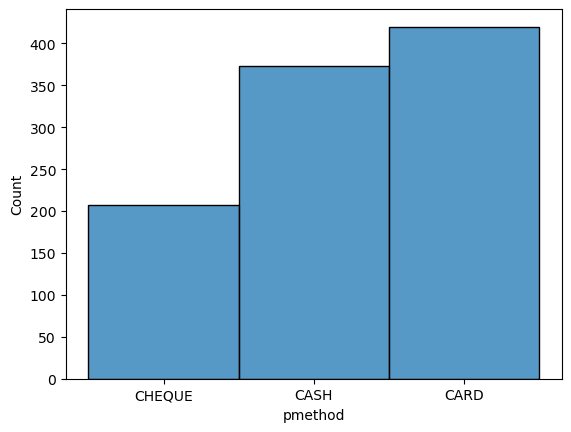

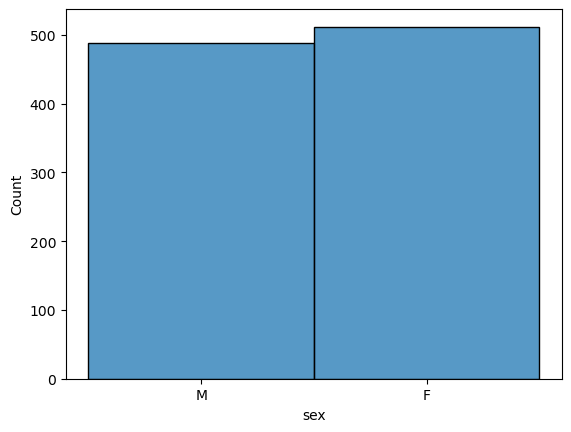

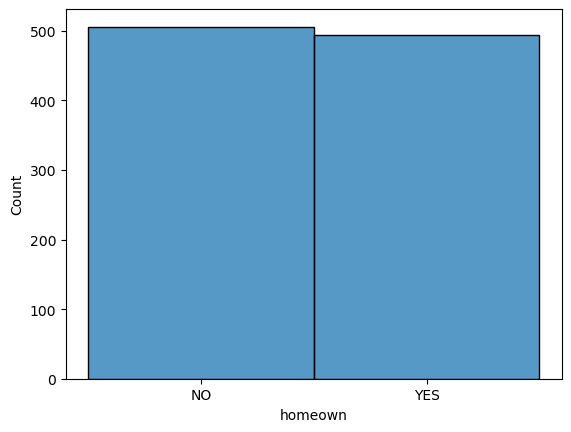

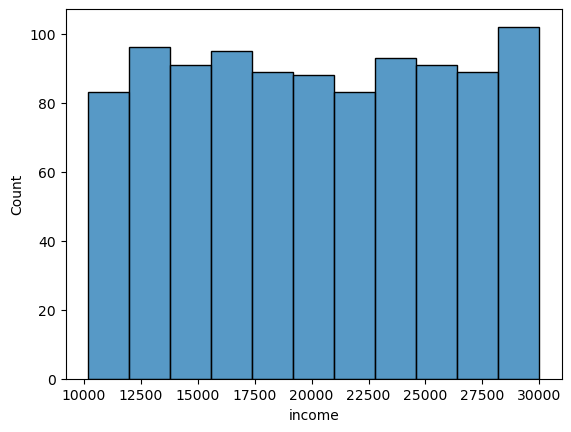

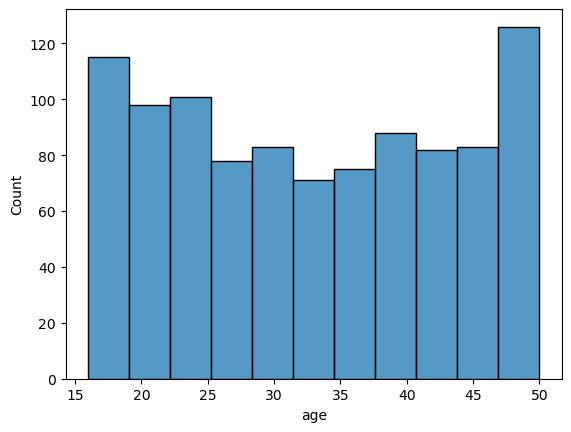

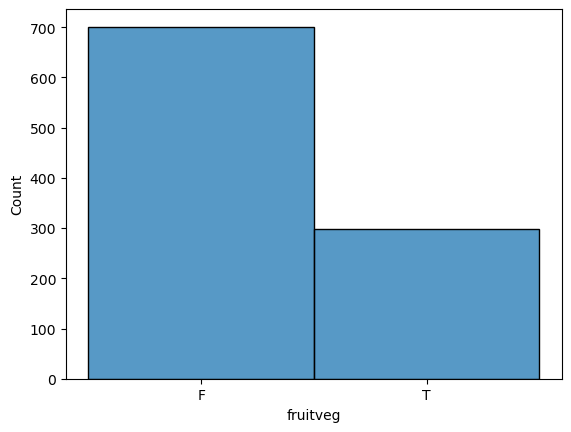

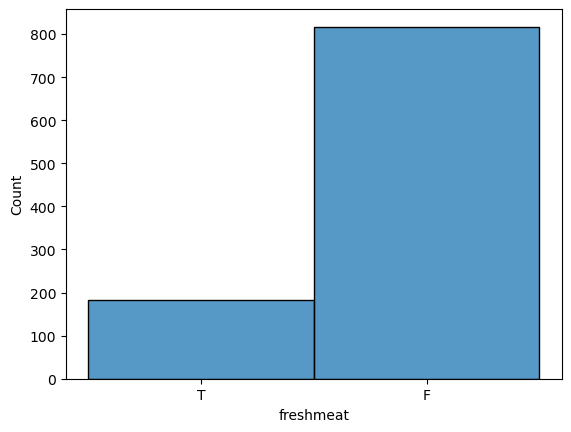

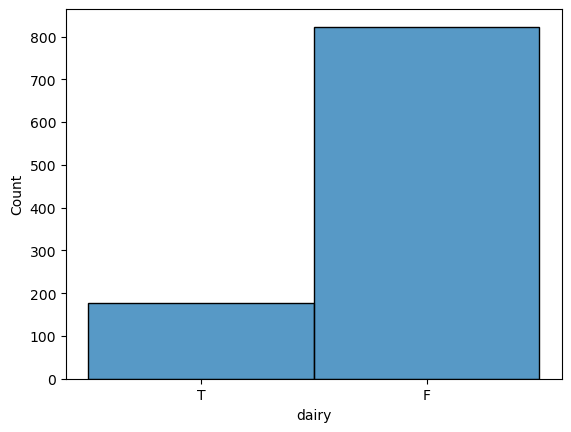

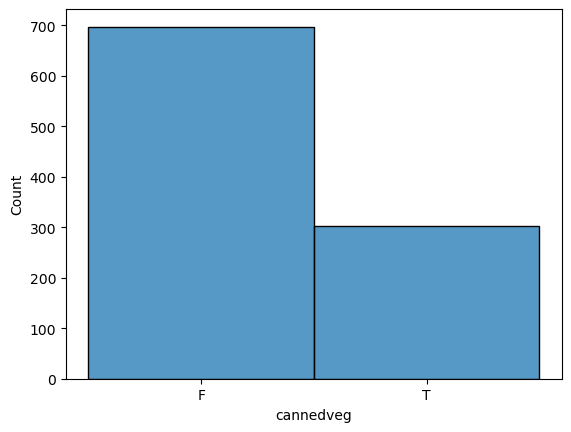

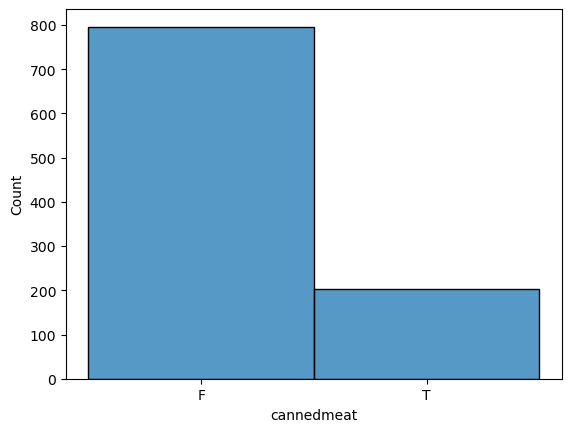

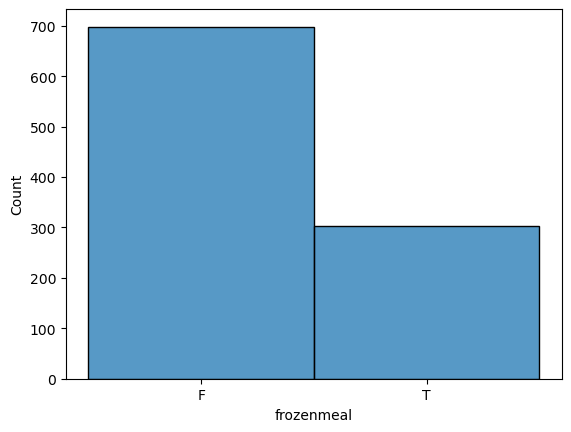

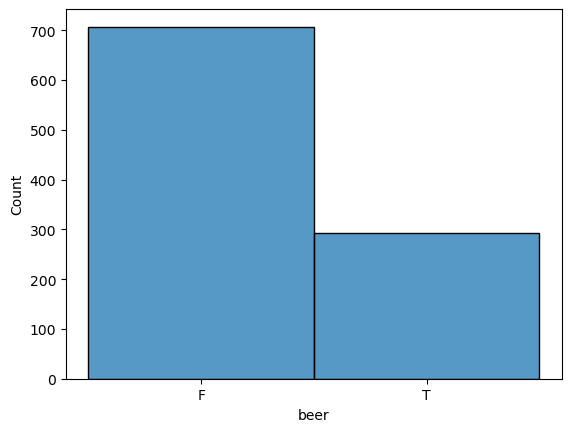

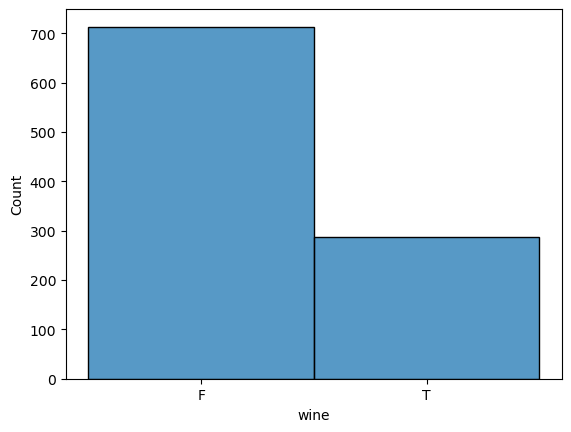

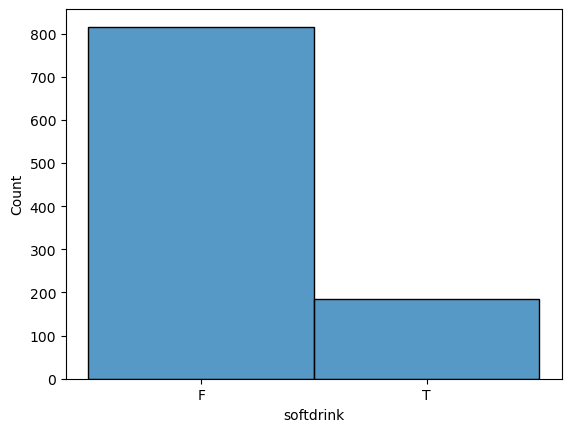

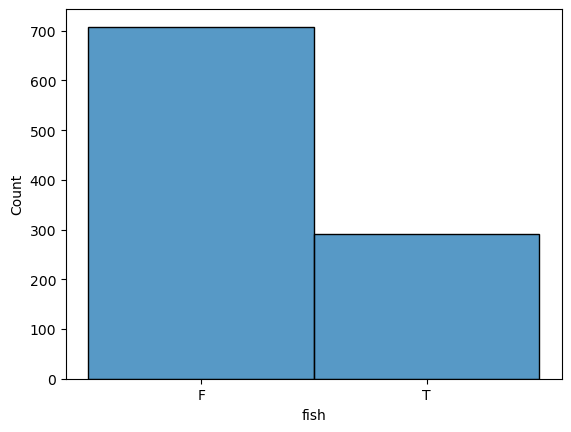

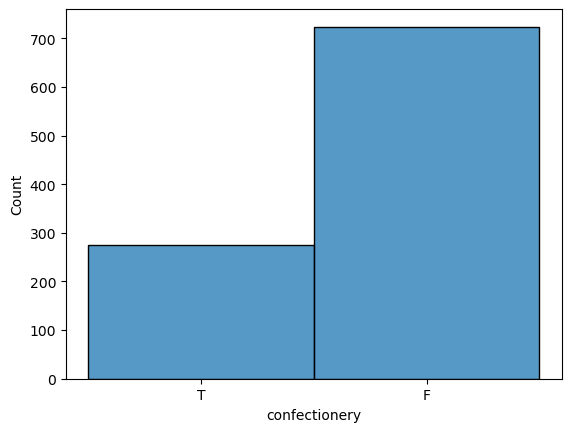

In [34]:
import matplotlib.pyplot as plt
for i in basketnames[1:]:
    sns.histplot(basket,x=i)
    plt.show()    

In [36]:
investigation=['pmethod','value','sex','homeown','income','age']
basket[investigation]#分别分析支付方式与题目中所列其他各变量之间的关系

,pmethod,value,sex,homeown,income,age
0,CHEQUE,42.7123,M,NO,27000,46
1,CASH,25.3567,F,NO,30000,28
2,CASH,20.6176,M,NO,13200,36
3,CARD,23.6883,F,NO,12200,26
4,CARD,18.8133,M,YES,11000,24
...,...,...,...,...,...,...
995,CARD,37.2056,M,NO,27500,27
996,CHEQUE,13.7353,F,NO,22600,23
997,CARD,29.0798,M,YES,27400,42
998,CASH,34.8576,F,YES,23300,43


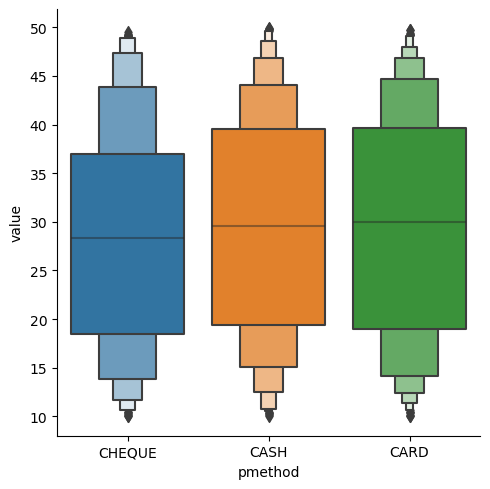

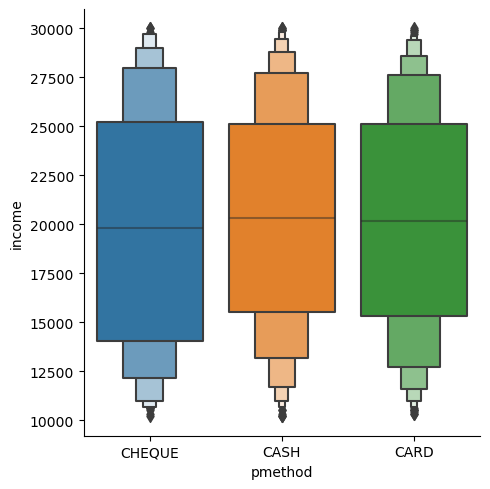

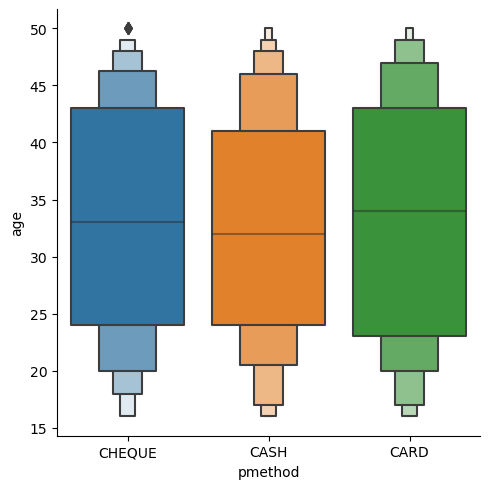

In [44]:
numeric_value=['value','income','age']
for i in numeric_value:
    sns.catplot(x='pmethod',y=i,data=basket,kind='boxen')
    plt.show()
#关系似乎不大，虽然图上显示CHEQUE的箱体略偏下，但是因为差别小，所以很难说有关系，其他一样。

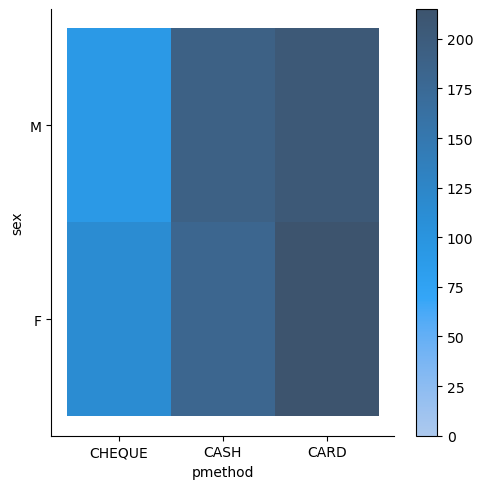

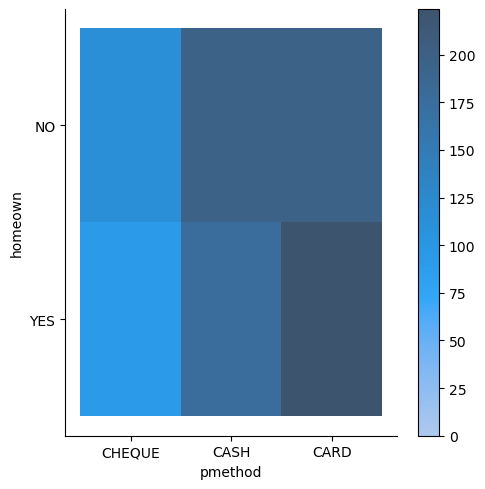

In [46]:
nominal_value=['sex','homeown']
for i in nominal_value:
    sns.displot(basket,x='pmethod',y=i,cbar=True)
    plt.show()
#本地人似乎更喜欢用信用卡支付

1.2.2 关联规则挖掘（2分）  
(1) 利用fruitveg, freshmeat, dairy, cannedveg, cannedmeat, frozenmeal, beer, wine, softdrink, fish, confectionery字段进行关联规则挖掘
，可自行指定最小支持度和最小置信度阈值，并给出理由（1分）；     
(2) 选出至少4条找到的关联规则进行比较和解释（1分）。

In [108]:
assoc_names=['fruitveg','freshmeat', 'dairy','cannedveg', 
             'cannedmeat','frozenmeal', 'beer', 'wine', 'softdrink', 'fish', 'confectionery']
assoc=basket.loc[:,assoc_names]
assoc.to_csv("association.txt")

In [117]:
def data_generator(filename):
    """
    Data generator, needs to return a generator to be called several times.
    """
    def data_gen():
        with open(filename) as file:
            firstline=file.readline()
            foods=firstline.split(',')
            for line in file:
                items=line.split(',')
                itemset=[]
                for i in range(len(items)):
                    if items[i]=='T':
                        itemset.append(foods[i])
                yield tuple(itemset)
    return data_gen()

In [130]:
from efficient_apriori import apriori
itemsets, rules = apriori(data_generator('association.txt'),
                          min_support=0.1,  min_confidence=0.3)#只有在这个取值下才可以获得数量合适的规则
print(rules,itemsets,sep='\n')

[{cannedveg} -> {beer}, {beer} -> {cannedveg}, {frozenmeal} -> {beer}, {beer} -> {frozenmeal}, {frozenmeal} -> {cannedveg}, {cannedveg} -> {frozenmeal}, {fruitveg} -> {fish}, {fish} -> {fruitveg}, {cannedveg, frozenmeal} -> {beer}, {beer, frozenmeal} -> {cannedveg}, {beer, cannedveg} -> {frozenmeal}, {frozenmeal} -> {beer, cannedveg}, {cannedveg} -> {beer, frozenmeal}, {beer} -> {cannedveg, frozenmeal}]
{1: {('freshmeat',): 183, ('dairy',): 177, ('cannedveg',): 303, ('frozenmeal',): 302, ('beer',): 293, ('fish',): 292, ('wine',): 287, ('fruitveg',): 299, ('softdrink',): 184, ('cannedmeat',): 204}, 2: {('beer', 'cannedveg'): 167, ('beer', 'frozenmeal'): 170, ('cannedveg', 'frozenmeal'): 173, ('fish', 'fruitveg'): 145}, 3: {('beer', 'cannedveg', 'frozenmeal'): 146}}


{cannedveg} -> {beer}，罐装蔬菜和啤酒,
{frozenmeal} -> {beer}，冻肉和啤酒
{frozenmeal} -> {cannedveg}，冻肉和罐装蔬菜上述三者可能适用于周末，好吃并且省事方便，很适合休闲。        
{fruitveg} -> {fish}，蔬菜水果和鱼,可能是因为这样吃更健康

### 第二部分：社会网络分析（本部分满分5分）

数据：MAG数据可视化领域的数据（和之前的练习、作业相同的数据）。

2.1 请构建作者和作者之间的合著网络（节点：作者；无向边：两个作者之间存在合著关系，即他们至少一次同时出现在一篇论文的作者列表中；边的权重：两个作者间的合著次数）。计算以下指标或回答以下问题（共2.75分）：

（1）网络中节点的数量（0.25分）；

（2）网络中边的数量（0.25分）；

（3）网络的平均聚类系数（Average clustering coefficient）（0.25分）；

（4）网络的密度（0.25分）；

（5）对边权的分布做可视化，并对可视化结果做简要描述（0.5分，其中可视化0.25分，描述0.25分）；

（6）对节点的度分布进行描述（0.5分，其中对度分布进行适当的可视化0.25分，对结果做描述0.25分）；

（7）选择网络中节点度数最高的5个节点，然后计算它们的degree centrality和closeness centrality（0.75分）。

In [ ]:
author=pd.read_csv(r"D:\数据分析练习用\MAG可视化数据集\matplotlib练习B-数据 (1)\author2paper_table.txt",sep=';')
author_to_merge=author.take([0,1],axis=1)
author_edge=author_to_merge.merge(author_to_merge[['paper_id','author_id']].rename(columns={'author_id':'author_id'+"_2"})
                                  ,on='paper_id')

author_edge=author_edge.loc[author_edge['author_id']<author_edge['author_id_2']]

temp = [[name[0],name[1],len(group)] for name,group in author_edge.groupby(['author_id','author_id_2'])]
author_edge = pd.DataFrame(temp,columns=['author_id','author_id_2','cooperation'])

author_edge

In [ ]:
graph= nx.from_pandas_edgelist(df=author_edge, 
                            source='author_id',target='author_id_2',edge_attr='cooperation')


In [ ]:
print('number of nodes:',graph.number_of_nodes())#网络中节点数量
print('number of edges:',graph.number_of_edges())#网络中边的数量
print('Average clustering coefficient:',nx.average_clustering(graph))#网络的平均聚类系数
print('network density:',nx.density(graph))#网络的密度

In [ ]:
sns.histplot(author_edge,x='cooperation',bins=25)
plt.yscale('log')
plt.xlabel("$weights-of-edges$", fontsize=14)
plt.ylabel("$distribution$", fontsize=14)

绝大部分的边权重为一，表明大部分作者之间只会合作一次，保持了密切合作的作者并不多。

In [ ]:
d = dict(nx.degree(graph))
print('average degree:',sum(d.values())/graph.number_of_nodes())
plt.hist(x=d.values(),bins=100)
plt.yscale('log')
plt.show()

In [ ]:
plt.hist(x=d.values(),bins=100)
plt.yscale('log')
plt.xscale('log')
plt.show()

可以看出，度小的概率越大，度分布接近幂律分布。

In [ ]:
print(nx.degree_assortativity_coefficient(graph))

可见该图节点具有度数上的同质性。

In [ ]:
degreelst=sorted(d.values())
threshold=degreelst[-5]
print(threshold)
dict_dc=nx.degree_centrality(graph)
# for n,nbrs in graph.adjacency_iter():
#     for nbr, eattr in nbrs.items():
#         data=eattr['cooperation']
for node in graph.nodes():
    if graph.degree(node)>=threshold:
        print('top_5 nodes:',node,'degree_centrality:',dict_dc[node],
              'closeness centrality:',nx.closeness_centrality(graph,node))

2.2 请构建论文和论文之间的引用网络（节点：论文，有向边：论文A引用了论文B，意即论文B出现在了A的参考文献列表中，边的权重：无）。计算以下指标或回答以下问题（共1.75分）：

（1）找出两个你认为比较“重要”的节点（建议使用上课提到的几种中心性），然后计算它们之间的最短路径（0.5分）；

（2）从现在的引用网络中构建一个子网络，这个子网络的所有节点在原引用网络都至少被引5次，这个子网络的边即上述筛选过的节点之间的引用关系。请使用边列表（edgelist）的形式将这个子网络写（write）入一个文件中。（1.25分，其中正确的建立子网络1分，写入文件0.25分）；


In [ ]:
citation=pd.read_csv(r"D:\数据分析练习用\MAG可视化数据集\matplotlib练习B-数据 (1)\citation_table.txt",sep=';')
print(citation.size)
new=citation.drop_duplicates()
print(new.size)#没有重复值
citation.isnull().sum()#没有缺失值

In [ ]:
ci_graph=nx.from_pandas_edgelist(df=citation,source='citing_id',
                                 target='cited_id',
                                 create_using=nx.DiGraph())

In [ ]:
dict_bc=nx.betweenness_centrality(ci_graph,k=1000)
maxNode_bc=max(dict_bc,key=lambda i:dict_bc[i])
print(maxNode_bc)

In [ ]:
dict_cc=nx.closeness_centrality(ci_graph)
maxNode_cc=max(dict_bc,key=lambda i:dict_cc[i])
print(maxNode_cc)

In [ ]:
dict_dc=nx.degree_centrality(ci_graph)
maxNode_dc=max(dict_bc,key=lambda i:dict_dc[i])
print(maxNode_dc)

In [ ]:
dict_ct=nx.clustering(ci_graph)
maxNode_ct=max(dict_bc,key=lambda i:dict_ct[i])
print(maxNode_ct)

In [ ]:
print('shortest path',nx.shortest_path(ci_graph,source=maxNode_bc,target=maxNode_cc))
print('length of the shortest path:',nx.shortest_path_length(ci_graph,source=maxNode_bc,target=maxNode_cc))

In [ ]:
print('shortest path',nx.shortest_path(ci_graph,source=maxNode_bc,target=maxNode_dc))
print('length of the shortest path:',nx.shortest_path_length(ci_graph,source=maxNode_bc,target=maxNode_dc))

In [ ]:
node_list=[]
for node in ci_graph.nodes():
    if ci_graph.in_degree(node)>=5:
        node_list.append(node)

coregraph=citation.loc[(citation.loc[:,'citing_id'].isin(node_list)) & 
                       (citation.loc[:,'cited_id'].isin(node_list))]
core_graph=nx.from_pandas_edgelist(df=coregraph,source='citing_id',
                                 target='cited_id',
                                 create_using=nx.DiGraph())
fh = open("test.edgelist", "wb")
nx.write_edgelist(core_graph, fh)

2.3 简要回答（不超过200字）：什么是六度分割理论？它有什么应用？（0.5分）

如果将全世界所有的人都视为一个个结点，人与人之间互相认识即表明两个人之间存在一条无权边，
这样就可以形成一个无向图，那么任意两个节点之间的最短路径距离都要小于等于6。
它揭示了人际关系网络的小世界效应，小世界网络同时具有“高网络聚集度”和“低平均路径”的特性，
Watts与Strogatz也先后在疾病传播、昆虫神经系统和电力系统中揭示出现实网络确实符合小世界模型。